In [2]:
from google.colab import files 
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv
Saving life_expectancy.csv to life_expectancy.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn
import io
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from scipy import stats
import plotly.express as px
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [78]:
life_expectancy = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))
life_expectancy = life_expectancy[(life_expectancy.Year == 2014)].iloc[:,0:]
impute = life_expectancy.iloc[:,3:]
imp = IterativeImputer(max_iter=10, random_state=0)
impute_transformed = imp.fit_transform(impute)

for row in range(len(life_expectancy)):
  for col in range(3, len(life_expectancy.iloc[0,:])):
    life_expectancy.iloc[row,col] = impute_transformed[row, col-3]

life_expectancy = life_expectancy.reset_index(drop=True)

In [31]:
life_expectancy = life_expectancy.drop('Adult Mortality', 1)
life_expectancy = life_expectancy.drop('infant deaths', 1)
life_expectancy = life_expectancy.drop('Hepatitis B', 1)
life_expectancy = life_expectancy.drop('Measles ', 1)
life_expectancy = life_expectancy.drop('under-five deaths ', 1)
life_expectancy = life_expectancy.drop('Polio', 1)
life_expectancy = life_expectancy.drop('Diphtheria ', 1)
life_expectancy = life_expectancy.drop(' thinness  1-19 years', 1)
life_expectancy = life_expectancy.drop(' thinness 5-9 years', 1)
life_expectancy = life_expectancy.drop('Income composition of resources', 1)
life_expectancy = life_expectancy.reset_index(drop=True)

In [27]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      life_expectancy.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Hepatitis B                        10
Measles                             0
 BMI                                2
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                28
Population                         41
 thinness  1-19 years               2
 thinness 5-9 years                 2
Income composition of resources    10
Schooling                          10
dtype: int64


In [10]:
#for i in life_expectancy.columns[life_expectancy.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    #life_expectancy[i].fillna(life_expectancy[i].mean(),inplace=True)

In [25]:
life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
1,Albania,2014,Developing,77.5,8.0,0.0,4.51,428.749067,98.0,0.0,57.2,1.0,98.0,5.88,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
2,Algeria,2014,Developing,75.4,11.0,21.0,0.01,54.237318,95.0,0.0,58.4,24.0,95.0,7.21,95.0,0.1,547.851700,3.911331e+07,6.0,5.8,0.741,14.4
3,Angola,2014,Developing,51.7,348.0,67.0,8.33,23.965612,64.0,11699.0,22.7,101.0,68.0,3.31,64.0,2.0,479.312240,2.692466e+06,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,2014,Developing,76.2,131.0,0.0,8.56,2422.999774,99.0,0.0,47.0,0.0,96.0,5.54,99.0,0.2,12888.296670,6.757694e+06,3.3,3.3,0.782,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2014,Developing,73.9,158.0,9.0,6.47,0.000000,78.0,0.0,61.5,10.0,79.0,5.26,78.0,0.1,2821.314369,5.443485e+06,1.6,1.5,0.771,14.2
179,Viet Nam,2014,Developing,75.9,128.0,28.0,4.09,0.000000,95.0,15033.0,16.7,35.0,96.0,7.70,95.0,0.1,3065.991210,1.257577e+08,14.3,14.7,0.675,12.5
180,Yemen,2014,Developing,65.4,228.0,37.0,0.01,0.000000,73.0,815.0,4.4,47.0,67.0,5.64,73.0,0.1,2386.004962,1.235089e+07,13.7,13.5,0.500,9.0
181,Zambia,2014,Developing,61.1,314.0,28.0,0.01,196.667577,86.0,9.0,22.8,41.0,78.0,4.99,86.0,4.3,1738.882200,1.562974e+06,6.3,6.2,0.570,12.5


In [10]:
profile = ProfileReport(life_expectancy)
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning:

Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

TraitError: ignored

In [10]:
pip install autoviz

     |████████████████████████████████| 44 kB 1.2 MB/s 


In [11]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


In [23]:
life_expectancy.shape

(183, 22)

In [6]:
sep = ','
target = 'Life expectancy '
datapath = ''
filename = 'life_expectancy.csv'

Shape of your Data Set loaded: (183, 22)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    21 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables

################ Regression VISUALIZATION Started #####################


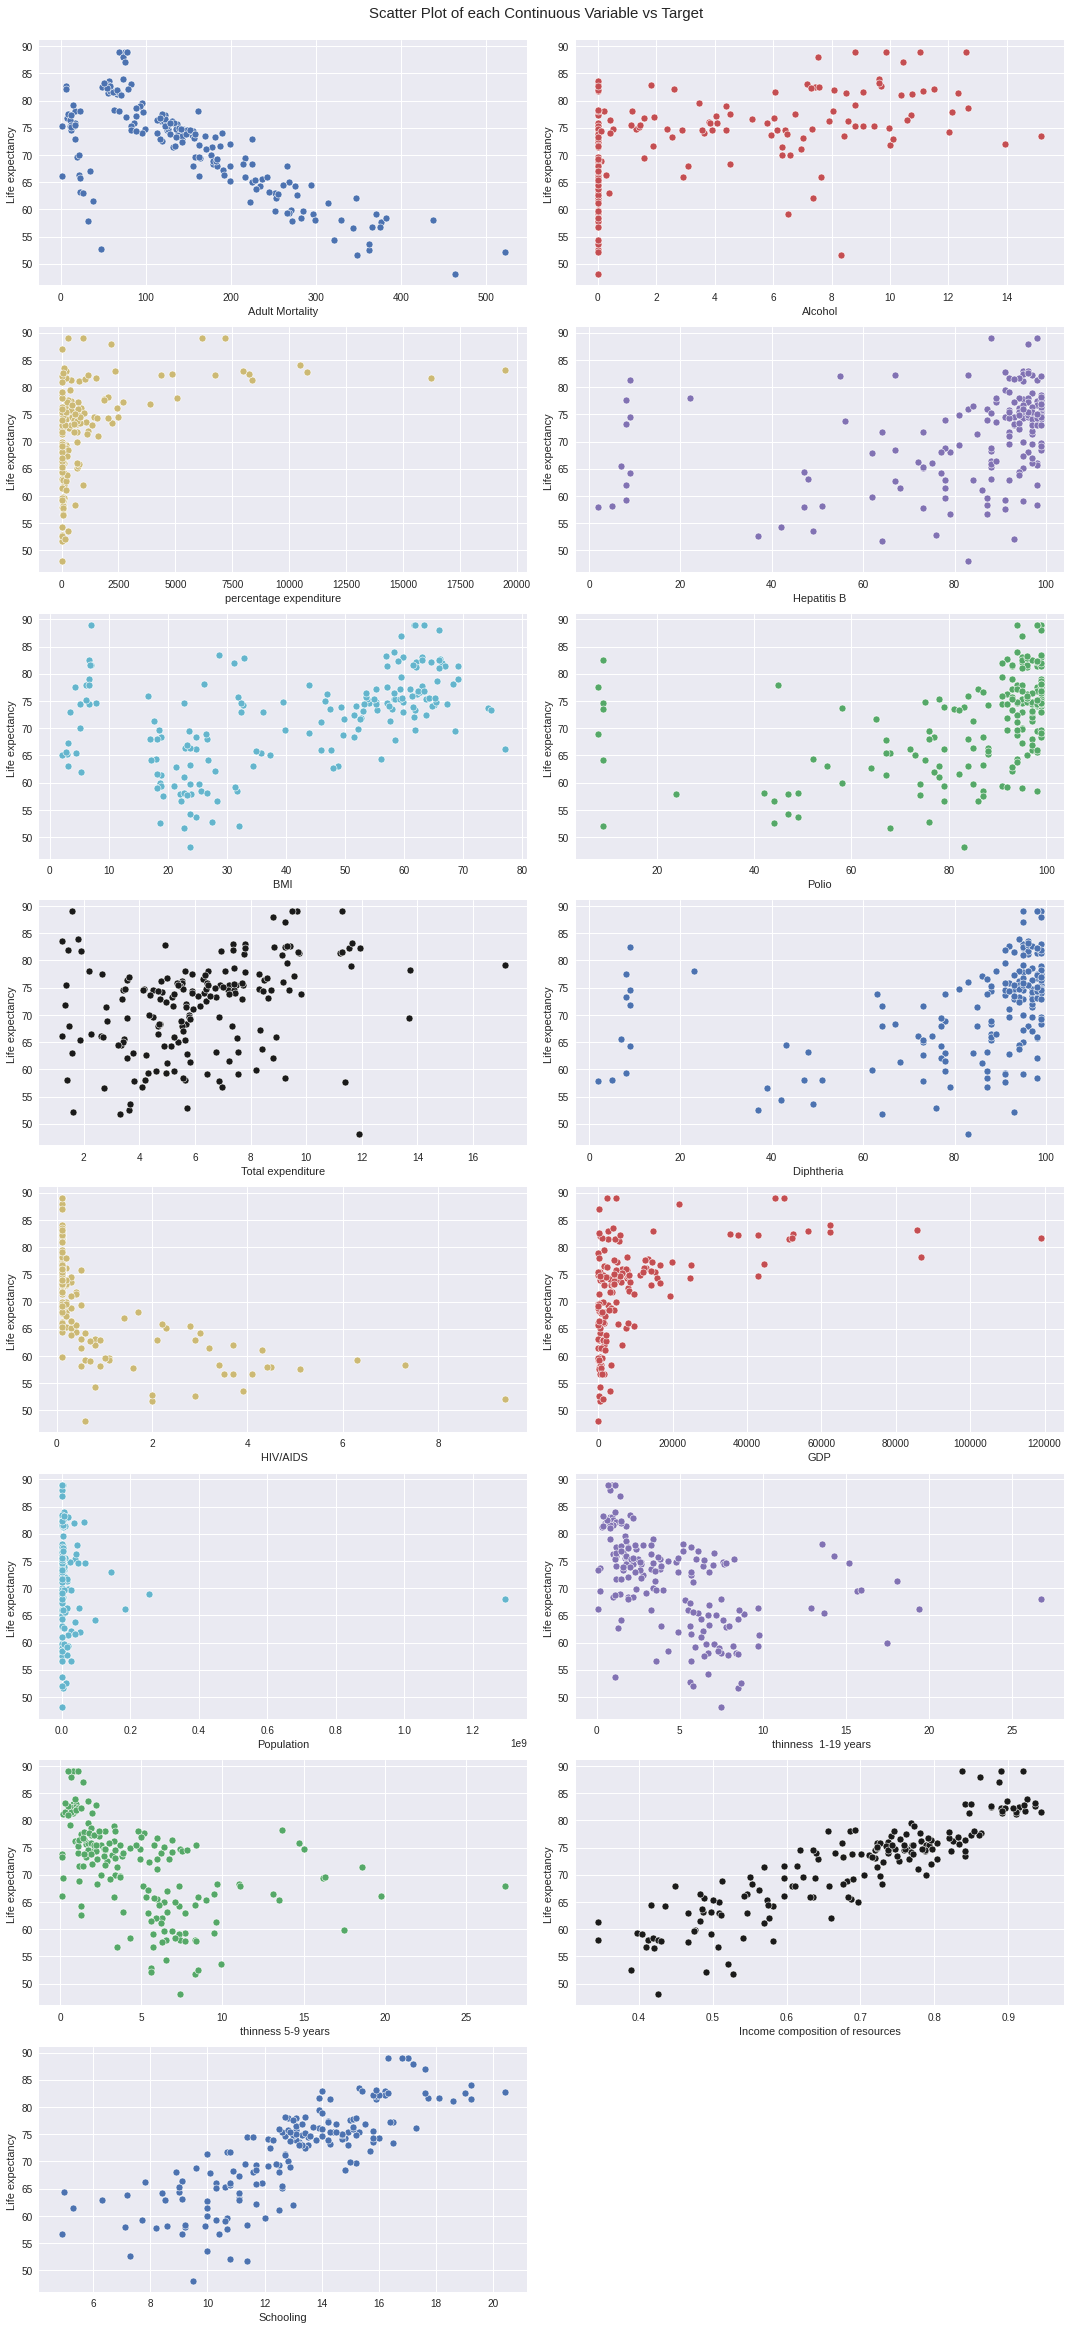

Number of All Scatter Plots = 120


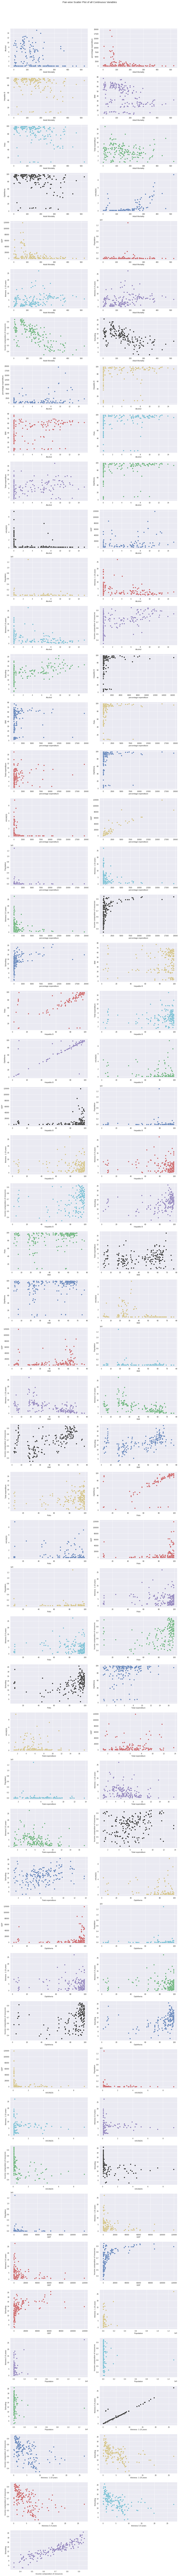

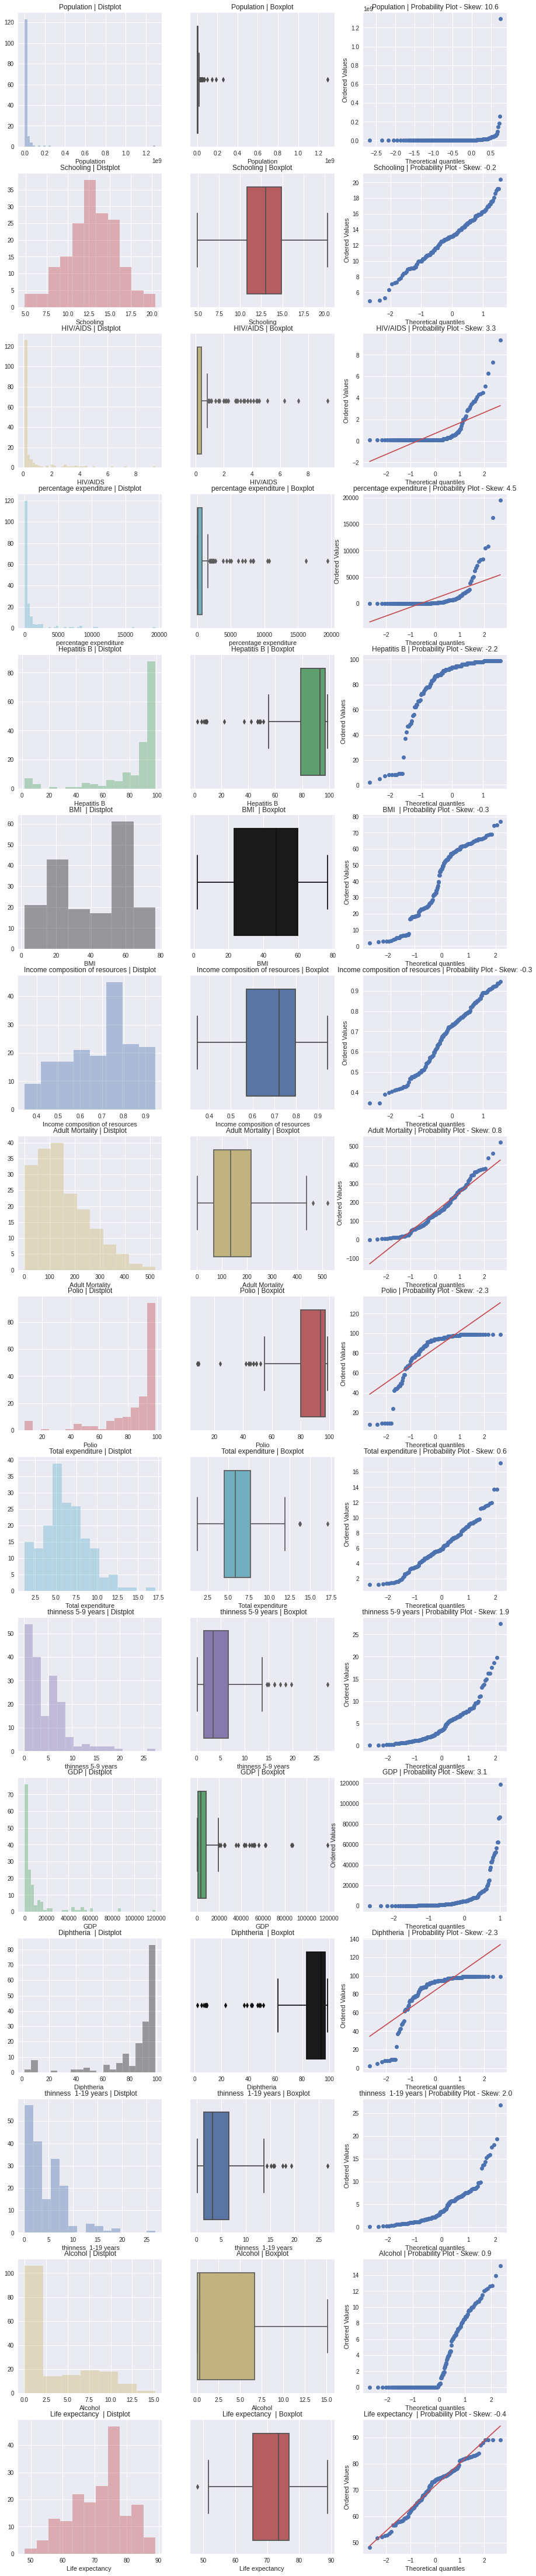

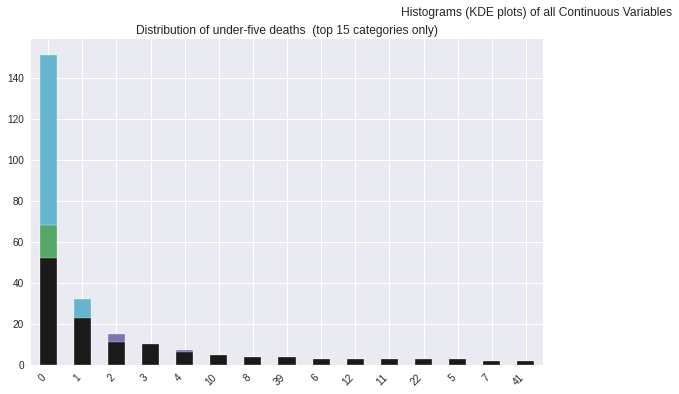

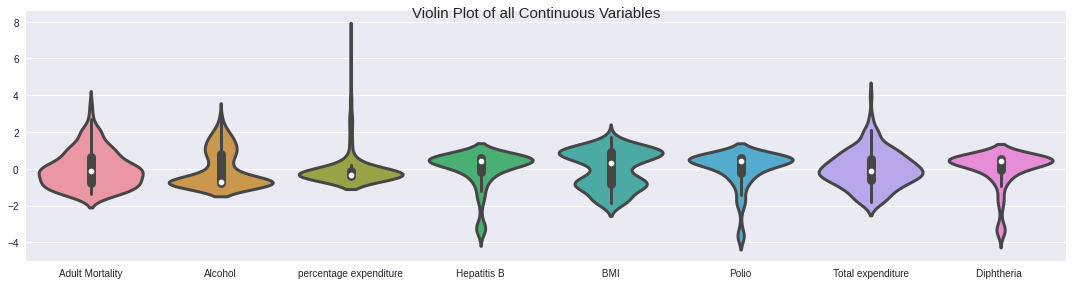

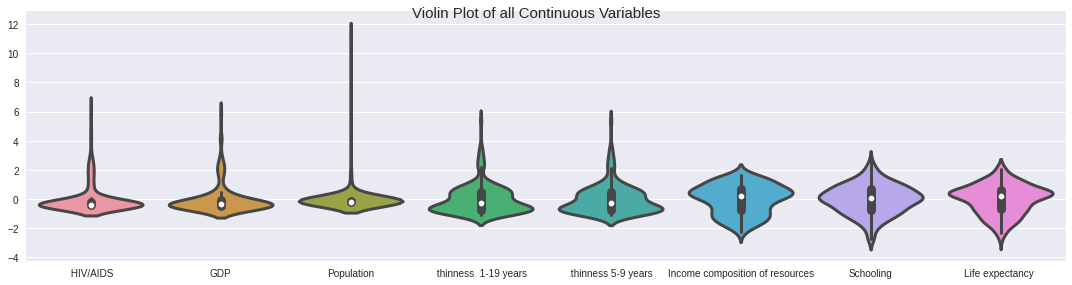

Could not draw Violin Plots


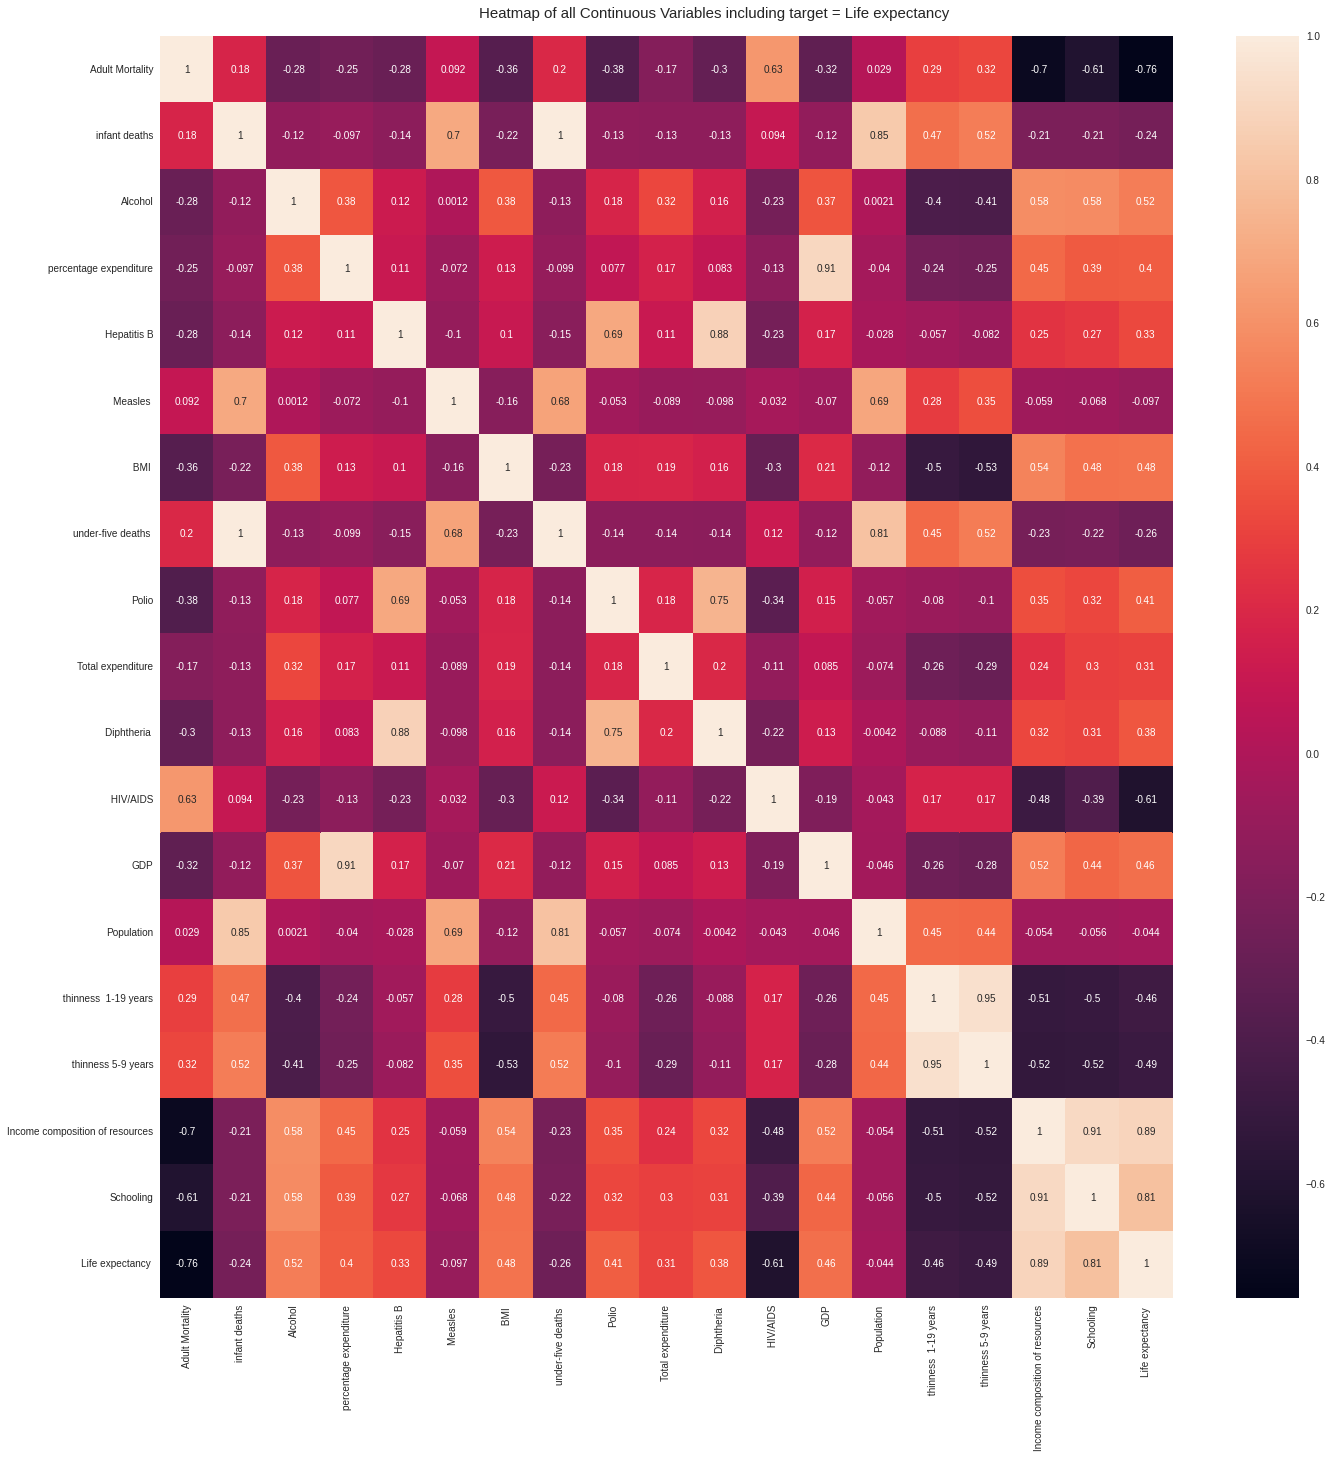

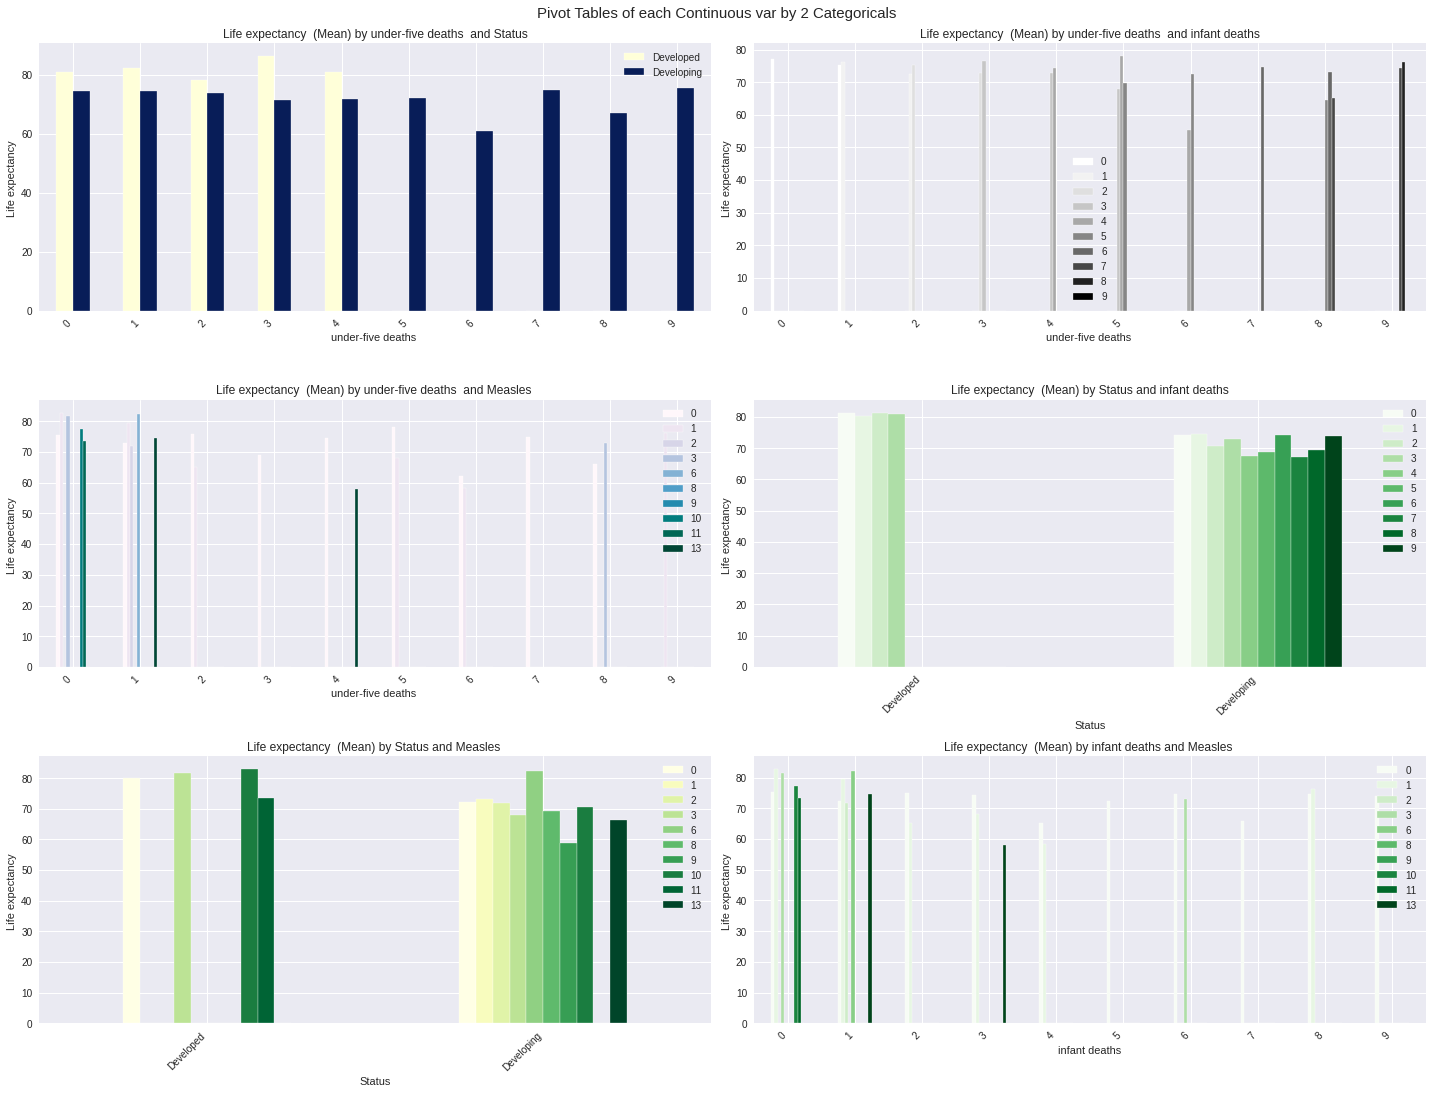

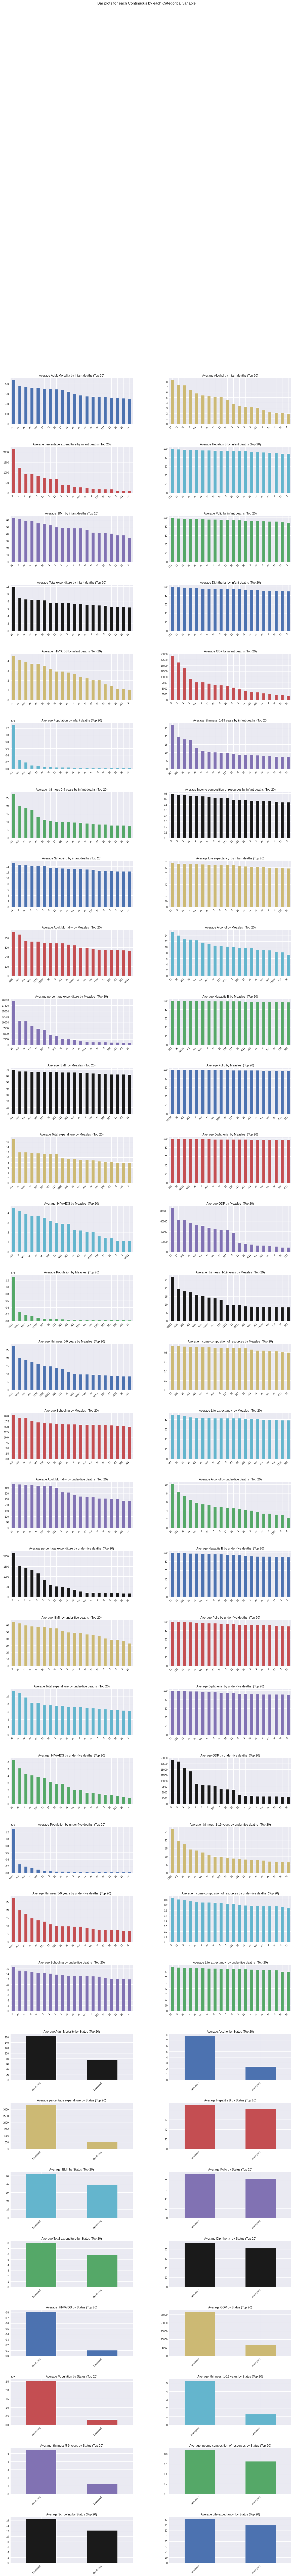

All Plots done
Time to run AutoViz (in seconds) = 81.612

 ###################### VISUALIZATION Completed ########################


In [12]:
dft = AV.AutoViz('', sep, target, life_expectancy)

In [38]:
life_expectancy.shape

(183, 22)

In [37]:
life_expectancy.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
1,Albania,2014,Developing,77.5,8.0,0.0,4.51,428.749067,98.0,0.0,57.2,1.0,98.0,5.88,98.0,0.1,4575.763787,2.889140e+05,1.2,1.3,0.761,14.2
2,Algeria,2014,Developing,75.4,11.0,21.0,0.01,54.237318,95.0,0.0,58.4,24.0,95.0,7.21,95.0,0.1,547.851700,3.911331e+07,6.0,5.8,0.741,14.4
3,Angola,2014,Developing,51.7,348.0,67.0,8.33,23.965612,64.0,11699.0,22.7,101.0,68.0,3.31,64.0,2.0,479.312240,2.692466e+06,8.5,8.3,0.527,11.4
4,Antigua and Barbuda,2014,Developing,76.2,131.0,0.0,8.56,2422.999774,99.0,0.0,47.0,0.0,96.0,5.54,99.0,0.2,12888.296670,6.757694e+06,3.3,3.3,0.782,13.9
5,Argentina,2014,Developing,76.2,118.0,8.0,7.93,847.371746,94.0,1.0,62.2,9.0,92.0,4.79,94.0,0.1,12245.256450,4.298152e+07,1.0,0.9,0.825,17.3
6,Armenia,2014,Developing,74.6,12.0,1.0,3.91,295.608714,93.0,13.0,54.1,1.0,95.0,4.48,93.0,0.1,3994.712355,2.962200e+04,2.1,2.1,0.739,12.7
7,Australia,2014,Developed,82.7,6.0,1.0,9.71,10769.363050,91.0,340.0,66.1,1.0,92.0,9.42,92.0,0.1,62214.691200,2.346694e+06,0.6,0.6,0.936,20.4
8,Austria,2014,Developed,81.4,66.0,0.0,12.32,8350.193523,98.0,117.0,57.1,0.0,98.0,11.21,98.0,0.1,51322.639970,8.541575e+06,1.8,2.0,0.892,15.9
9,Azerbaijan,2014,Developing,72.5,119.0,5.0,0.01,306.182431,94.0,0.0,51.5,6.0,97.0,6.40,94.0,0.1,7891.299776,9.535790e+05,2.8,2.9,0.752,12.2


In [79]:
X = life_expectancy[['Adult Mortality', 'infant deaths', 'Hepatitis B', 'Measles ', 'Alcohol', 'under-five deaths ', 'percentage expenditure', 'Polio', ' BMI ', 'Diphtheria ', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = life_expectancy['Life expectancy ']

In [20]:
X = life_expectancy[['Adult Mortality', 'Hepatitis B', 'under-five deaths ', 'percentage expenditure',' BMI ', 'Total expenditure', ' HIV/AIDS', ' thinness  1-19 years', 'Income composition of resources', 'infant deaths']] 
Y = life_expectancy['Life expectancy ']

In [52]:
X = life_expectancy[['Adult Mortality','Total expenditure', ' HIV/AIDS', 'Income composition of resources']] 
Y = life_expectancy['Life expectancy ']

In [ ]:
#Schooling, HIV/AIDS, Adult Mortality, Income composition, percentage expenditure, under five deaths, BMI, Diphteria, thinness 5-9 years, Income Composition of resources

In [ ]:
#dropped: 'GDP', ' BMI ', ' HIV/AIDS', 'Population'

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [54]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_prediction =  LR.predict(x_test)
y_prediction

array([70.43603876, 79.77311203, 57.00761784, 66.38110471, 64.2276789 ,
       78.93457079, 76.58087843, 56.09342253, 56.92610002, 57.08426962,
       62.59826162, 75.83556884, 68.31125904, 69.17703622, 60.08754103,
       71.81877914, 70.99208595, 73.73885706, 79.40685045, 74.4014233 ,
       60.46128684, 73.00873652, 79.0344035 , 57.56690578, 74.73524736,
       73.65849192, 59.77152712, 65.96608218, 54.23309251, 66.18465506,
       69.73757355, 59.84188323, 84.20992734, 81.61722423, 68.09952454,
       65.84206124, 82.62849192, 74.19138804, 58.45673398, 79.88556326,
       66.1921275 , 77.73713434, 79.70511395, 76.77775924, 75.77995845,
       74.43656146, 70.50869786, 62.71885483, 76.85107443, 81.09147991,
       76.09042616, 64.38992482, 76.03484181, 75.97260777, 80.45013086,
       77.4066896 , 72.23430932, 61.92757485, 75.20688173, 58.6626331 ,
       67.03557903])

In [56]:
mse = mean_squared_error(y_test, y_prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_prediction)
print("R2:", r2)

MSE: 10.074213297879274
RMSE: 3.173990122523899
R2: 0.8486177135339221


In [14]:
import statsmodels.api as sm

regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1143.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                   7.44e-111
Time:                        12:15:04   Log-Likelihood:                         -372.28
No. Observations:                 122   AIC:                                      780.6
Df Residuals:                     104   BIC:                                      831.0
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mortality                     0.0200      0.006      3.177      0.002       0.008       0.033
infant deaths                      -0.0249      0.111     -0.224      0.823      -0.245       0.195
Hepatitis B                         0.0903      0.043      2.120      0.036       0.006       0.175
Measles                          2.903e-05      0.000      0.146      0.884      -0.000       0.000
Alcohol                            -0.4308      0.155     -2.785      0.006      -0.737      -0.124
under-five deaths                   0.0205      0.079      0.260      0.795      -0.136       0.177
percentage expenditure              0.0002      0.000      0.428      0.670      -0.001       0.001
Polio                               0.0714      0.038      1.882      0.063      -0.004       0.147
 BMI                               -0.0174      0.036     -0.486      0.628      -0.089       0.054
Diphtheria                         -0.0966      0.047     -2.055      0.042      -0.190      -0.003
Total expenditure                   0.8026      0.229      3.507      0.001       0.349       1.257
 HIV/AIDS                          -0.0236      0.492     -0.048      0.962      -0.999       0.952
GDP                                -0.0001    7.1e-05     -1.795      0.076      -0.000    1.34e-05
Population                      -5.106e-09    2.4e-08     -0.212      0.832   -5.28e-08    4.25e-08
 thinness  1-19 years               1.0373      1.363      0.761      0.448      -1.665       3.740
 thinness 5-9 years                -0.6330      1.414     -0.448      0.655      -3.438       2.172
Income composition of resources    92.3465     10.639      8.680      0.000      71.250     113.443
Schooling                          -0.3605      0.506     -0.712      0.478      -1.365       0.644
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   2.385
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.185
Skew:                          -0.064   Prob(JB):                        0.912
Kurtosis:                       2.859   Cond. No.                     2.55e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
life_expectancy = life_expectancy.drop('GDP', 1)

In [19]:
life_expectancy = life_expectancy.drop(' BMI ', 1)

In [24]:
life_expectancy = life_expectancy.drop(' HIV/AIDS', 1)

In [28]:
life_expectancy = life_expectancy.drop('Population', 1)

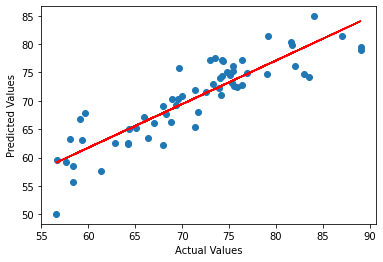

In [13]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()


In [57]:
regr = RandomForestRegressor(max_depth=2, n_estimators = 100, random_state=0)
regr.fit(x_train, y_train)
y_prediction_forest =  regr.predict(x_test)
y_prediction_forest

array([72.03138292, 79.53545577, 55.99102614, 66.09870527, 65.74808219,
       81.68202514, 74.45001673, 60.00360842, 63.87099119, 55.49114877,
       65.44665654, 74.65027191, 71.3277701 , 69.79356443, 61.19032668,
       73.42389972, 72.35188699, 74.65027191, 81.68202514, 74.65027191,
       60.62977686, 73.48475629, 77.24045496, 55.9186528 , 74.40627885,
       74.3323965 , 60.63596633, 67.98524766, 56.85497365, 66.19312834,
       72.25746392, 62.06427286, 81.79964538, 81.79964538, 70.09644546,
       65.91442208, 75.41873128, 74.3323965 , 62.16285746, 81.68202514,
       66.19312834, 74.76789214, 76.73660575, 74.98323564, 73.66624598,
       74.3323965 , 72.92011023, 60.67284731, 75.05021444, 81.68202514,
       74.65027191, 64.31253297, 74.65027191, 74.73233904, 81.68202514,
       75.70163281, 72.43464825, 61.57153444, 74.65027191, 60.42049845,
       71.6351418 ])

MSE: 9.423193583675658
RMSE: 3.069722069451184
R2: 0.8584003982911907


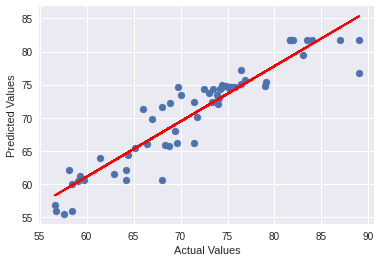

In [58]:
mse_forest = mean_squared_error(y_test, y_prediction_forest)
print("MSE:", mse_forest)
rmse_forest = np.sqrt(mse_forest)
print("RMSE:", rmse_forest)
r2_forest = r2_score(y_test, y_prediction_forest)
print("R2:", r2_forest)

plt.scatter(y_test, y_prediction_forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction_forest, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [81]:
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
y_prediction_XGB =  XGB.predict(x_test)
y_prediction_XGB

[12:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([72.52824 , 80.30358 , 57.712143, 66.79477 , 66.17414 , 83.0583  ,
       75.76815 , 59.25354 , 62.170563, 56.263374, 64.14833 , 76.339195,
       67.95599 , 64.78175 , 58.2352  , 72.452034, 73.02837 , 72.60045 ,
       82.352066, 71.84393 , 59.189945, 74.63927 , 78.18597 , 57.109856,
       72.00672 , 75.02226 , 60.175858, 68.66085 , 57.83395 , 68.616005,
       72.098854, 61.19074 , 83.32535 , 83.71007 , 71.30342 , 65.31174 ,
       80.747444, 73.71754 , 63.421883, 81.37315 , 66.05051 , 75.800896,
       82.46923 , 76.07085 , 72.483665, 73.55541 , 71.51522 , 59.437355,
       74.5345  , 83.8219  , 74.45958 , 62.39575 , 73.73865 , 74.23888 ,
       83.48311 , 76.836   , 71.19585 , 58.711628, 74.90547 , 59.68568 ,
       71.62847 ], dtype=float32)

MSE: 6.481141923619072
RMSE: 2.5458086973728156
R2: 0.9026097567821849


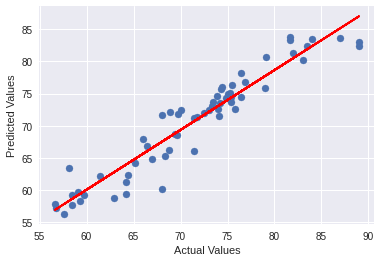

In [82]:
mse_XGB = mean_squared_error(y_test, y_prediction_XGB)
print("MSE:", mse_XGB)
rmse_XGB = np.sqrt(mse_XGB)
print("RMSE:", rmse_XGB)
r2_XGB = r2_score(y_test, y_prediction_XGB)
print("R2:", r2_XGB)

plt.scatter(y_test, y_prediction_XGB)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction_XGB, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

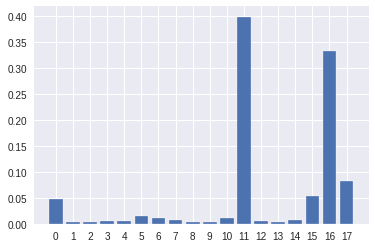

In [86]:
plt.bar(range(len(XGB.feature_importances_)), XGB.feature_importances_)
plt.xticks(np.arange(0, 18, step=1))
plt.show()

In [100]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


thresholds = sorted(XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    predictions = selection_model.predict(select_X_test)
    print('______________')
    print(len(select_X_train[0]))
    mse_XGB = mean_squared_error(y_test, predictions)
    print("MSE:", mse_XGB)
    rmse_XGB = np.sqrt(mse_XGB)
    print("RMSE:", rmse_XGB)
    r2_XGB = r2_score(y_test, predictions)
    print("R2:", r2_XGB)
    print('______________')

[12:59:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
18
MSE: 6.481141923619072
RMSE: 2.5458086973728156
R2: 0.9026097567821849
______________
[12:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
17
MSE: 6.279717385354079
RMSE: 2.505936428833357
R2: 0.9056365050007628
______________
[12:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
16
MSE: 6.209946302894244
RMSE: 2.491976384898991
R2: 0.906684934856244
______________
[12:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
15
MSE: 5.893292128227092
RMSE: 2.4276103740565724
R2: 0.9114432054588958
______________
[12:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear 

In [61]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [66]:
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [64]:
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.167 (0.537)
